<a href="https://colab.research.google.com/github/icarocamelo/inf-6333-applied-ai/blob/main/timeseries-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('https://raw.githubusercontent.com/icarocamelo/inf-6333-applied-ai/main/dataset/node1.csv', header=None, parse_dates=True)
data.columns = ['Timestamp', 'Formatted Timestamp', 'Busy System', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle']
# data['Ticks'] = range(0, len(data.index.values))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 672
Number of attributes = 8


,Timestamp,Formatted Timestamp,Busy System,Busy User,Busy Iowait,Busy IRQs,Busy Other,Idle
0,1646410320,2022-03-04 16:12,22.7,354.0,1.28,10.0,1.2200,477.0
1,1646410560,2022-03-04 16:16,31.1,919.0,1.12,13.7,0.1040,250.0
2,1646410800,2022-03-04 16:20,34.7,592.0,2.14,15.8,0.0851,750.0
3,1646411040,2022-03-04 16:24,33.1,830.0,1.69,25.0,0.1000,428.0
4,1646411280,2022-03-04 16:28,43.4,70.3,3.16,17.6,0.1110,1460.0


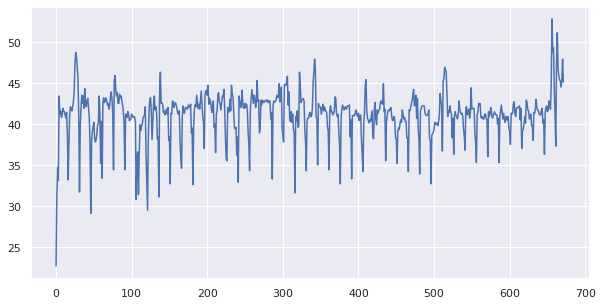

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10, 5)})
data['Busy System'].plot()

# Training the model
- Consider 'Busy System' and 'Timestamp'

Coefficients: 
 [1682.14212919]
Mean squared error: 2053541002.78
Coefficient of determination: -0.00


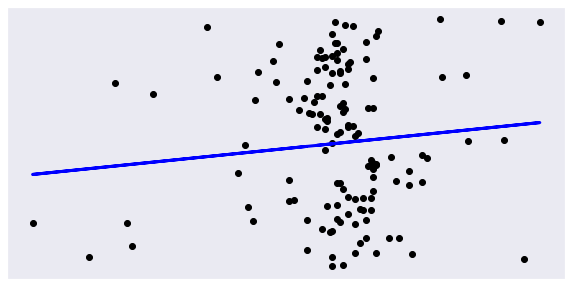

In [ ]:
# Consider 'Busy System' and 'Timestamp'
X = data.drop(columns=['Timestamp', 'Formatted Timestamp', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle'])
y = data['Timestamp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# print(predictions)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()